# How well do jobs and skills pay for Data Analysts?

### Methology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [20]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
# filter for job titles and country

df_aus = df[(df['job_country'] == 'Australia')].dropna(subset=['salary_year_avg'])

# find top 10 jobs
job_titles = df_aus['job_title_short'].value_counts().index[:10].tolist()

job_titles

['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Senior Data Scientist',
 'Data Analyst',
 'Business Analyst',
 'Senior Data Analyst',
 'Cloud Engineer']

In [22]:
df_aus_top10 = df_aus[df_aus['job_title_short'].isin(job_titles)]

In [23]:
# find median salary for these roles
job_order = df_aus_top10.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

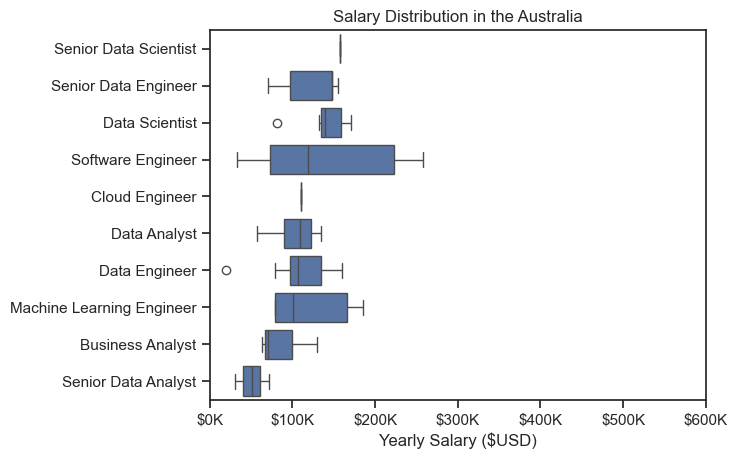

In [24]:
# plot with seaborn, sort by salary median

sns.boxplot(data=df_aus_top10, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the Australia')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


# Investigate Median Salary vs. Skill for Data Analysts

In [25]:
df_DA_aus = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'Australia')
].copy()

df_DA_aus = df_DA_aus.dropna(subset=['salary_year_avg'])

In [26]:
df_DA_aus = df_DA_aus.explode('job_skills')

df_DA_aus[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
42522,135000.0,sql
42522,135000.0,snowflake
42522,135000.0,tableau
407319,100500.0,sql
407319,100500.0,snowflake


In [27]:
# find top pay 10 skills

df_DA_top_pay = df_DA_aus.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)


df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
tableau,1,135000.0
go,1,118500.0
python,1,118500.0
r,1,118500.0
snowflake,2,117750.0
sql,4,109500.0
bigquery,1,100500.0
dax,1,100500.0
excel,3,100500.0


In [28]:
# find top 10 popular skills

df_DA_skills = df_DA_aus.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)


df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)


df_DA_skills

,count,median
job_skills,,
go,1,118500.0
python,1,118500.0
snowflake,2,117750.0
sql,4,109500.0
excel,3,100500.0
bigquery,1,100500.0
dax,1,100500.0
express,1,100500.0
power bi,1,100500.0


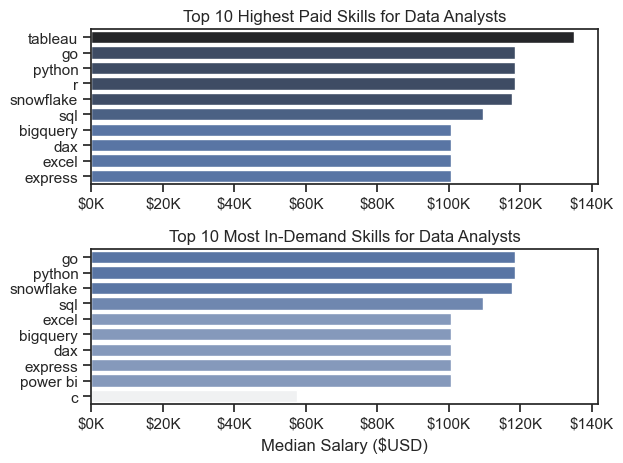

In [29]:
fig, ax = plt.subplots(2,1)

#set seaborn theme
sns.set_theme(style='ticks')

# plot df_DA_top_pay

# use seaborn.barplot
sns.barplot(
    data=df_DA_top_pay,
    x='median',
    y=df_DA_top_pay.index,
    ax=ax[0],
    hue ='median',
    palette='dark:b_r') # '_r' to reverse colroing

ax[0].legend().remove() # remove legend
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


# plot df_DA_skills

# use seaborn.barplot
sns.barplot(
    data=df_DA_skills,
    x='median',
    y=df_DA_skills.index,
    ax=ax[1],
    hue ='median',
    palette='light:b'
)

ax[1].legend().remove() # remove legend
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()